In [30]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

df=pd.read_csv(r"C:\Users\19692\Downloads\UB CS\2024 Fall\Homework\CES 587\CSE587-Project-UsedCarPricePrediction\carinfo_after_pre_clean.csv")
df.head()

,Unnamed: 0,year,make,model,price,mileage,Miles per gallon,Transmission,owner,VIN,...,cylinders,fuel,Drive type,Miles per gallon equivalent (MPGe),Range (when new),Time to fully charge battery (240V),Motor,Bed Length,exterior_color,interior_color
0,0,2015,Subaru,Outback Limited,16998,92000,25 city/32 hwy,Automatic,2.0,4S4BSANC4F3279791,...,NaN,NaN,NaN,NaN,NaN,NaN,non-electric,NaN,Silver,Black
1,1,2017,Subaru,Forester 2.5I,16998,79000,22 city/28 hwy,Manual 6 Speed,1.0,JF2SJAACXHG452398,...,4.0,Gas,All Wheel Drive,NaN,NaN,NaN,non-electric,NaN,Silver,Gray
2,2,2020,Subaru,Impreza,18998,43000,28 city/36 hwy,Automatic,1.0,4S3GKAB64L3608865,...,4.0,Gas,All Wheel Drive,NaN,NaN,NaN,non-electric,NaN,Blue,Black
3,3,2016,Subaru,Legacy 2.5I,14998,91000,26 city/36 hwy,Automatic,3.0,4S3BNAA63G3004121,...,4.0,Gas,All Wheel Drive,NaN,NaN,NaN,non-electric,NaN,Gray,Black
4,4,2021,Subaru,Crosstrek Premium,24998,53000,28 city/33 hwy,Automatic,1.0,JF2GTAEC8MH670080,...,4.0,Gas,All Wheel Drive,NaN,NaN,NaN,non-electric,NaN,Black,Black


**Data Cleaning for feature mileage,brand and price**

In [44]:
df=df.dropna(subset=['mileage','price','make']) # drop rows with NaN values in mileage, price or make
df = df[df['price']!=0] # drop rows with price equals to 0

# Question 1:  How does mileage of a car impact its resale value across different brands? (Te Shi)  
**Hypothesis 1: Generally higher mileage will correlate with a lower resale car value across all car brands**  

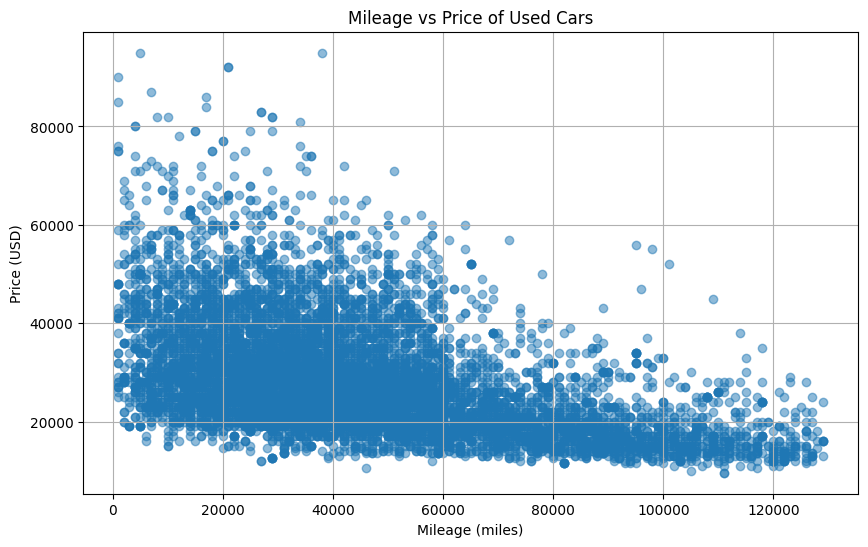

In [45]:
# plot relationship between mileage and price
plt.figure(figsize=(10,6))
plt.scatter(df['mileage'],df['price'],alpha=0.5)
plt.title('Mileage vs Price of Used Cars')
plt.xlabel('Mileage (miles)')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

In [67]:
# calcualte general correlation value between resale price and mileage
general_corr=df['mileage'].corr(df['price'])
print(general_corr)

-0.49604939623020256


The General Pearson correlation -0.49 indicates that the mileage has a moderate to fairly strong impacts to a car's final resale.

**Identify Outliers**  
From the graph, although as expect, there is a general trending that with the increase of mileage, the price decreases, some outliers can be identified. Thus linear-regression is used to find cars with abnormal relaitonship between price and mileage.

In [68]:
X = df[['mileage']] 
y = df['price']

# create and train the linear regression model
model = LinearRegression()
model.fit(X, y)

df['predicted_price'] = model.predict(X)

df['residuals'] = df['price'] - df['predicted_price']

std_residuals = np.std(df['residuals'])

#outliers are defined as cars that its residual is 3 times or more larger than average residuals
outliers = df[np.abs(df['residuals']) > (3 * std_residuals)]

print(outliers[['mileage', 'price', 'predicted_price', 'residuals']])

      mileage  price  predicted_price     residuals
622     22000  73998     32805.974921  41192.025079
625     19000  63998     33404.420010  30593.579990
628     24000  74998     32407.011528  42590.988472
644     29000  66998     31409.603047  35588.396953
680     34000  80998     30412.194565  50585.805435
...       ...    ...              ...           ...
9316    61000  56998     25026.188766  31971.811234
9588    14000  62998     34401.828491  28596.171509
9608    21000  65998     33005.456617  32992.543383
9952    14000  62998     34401.828491  28596.171509
9966     1000  74998     36995.090543  38002.909457

[151 rows x 4 columns]


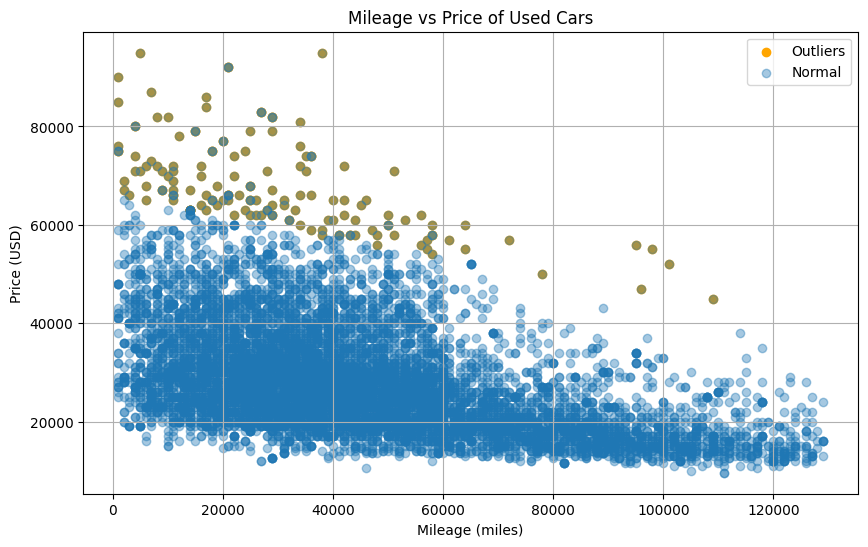

In [69]:
plt.figure(figsize=(10,6))
plt.scatter(outliers['mileage'], outliers['price'], color='orange', label='Outliers')
plt.scatter(df['mileage'],df['price'],alpha=0.4,label='Normal')
plt.title('Mileage vs Price of Used Cars')
plt.xlabel('Mileage (miles)')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [70]:
# outliers' correlation value between resale price and mileage
outlier_corr=outliers['mileage'].corr(outliers['price'])
print(outlier_corr)

-0.6201513912533334


**Hypothesis 2: Although there is a general negative correlation between mileage and resale value, different car brands may have significantly different retention rates**

In [71]:
brand_corr = df.groupby('make').apply(lambda x: x['mileage'].corr(x['price']))
print(brand_corr)

make
Acura           -0.814417
Audi            -0.616308
BMW             -0.553016
Buick           -0.580097
Cadillac        -0.547539
Chevrolet       -0.382242
Chrysler        -0.817717
Dodge           -0.700348
Ford            -0.533840
GMC             -0.368624
Honda           -0.724632
Hyundai         -0.661400
Infiniti        -0.669254
Jaguar          -0.687660
Jeep            -0.589360
Kia             -0.558088
Land            -0.531978
Lexus           -0.996593
Lincoln         -0.529215
Mazda           -0.793968
Mercedes-Benz   -0.510410
Mini            -0.771001
Mitsubishi      -0.591368
Nissan          -0.639723
Porsche         -0.502708
Ram             -0.409893
Subaru          -0.807472
Tesla           -0.592722
Toyota          -0.496162
Volkswagen      -0.503977
Volvo           -0.719717
dtype: float64


C:\Users\19692\AppData\Local\Temp\ipykernel_15056\2946568939.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  brand_corr = df.groupby('make').apply(lambda x: x['mileage'].corr(x['price']))


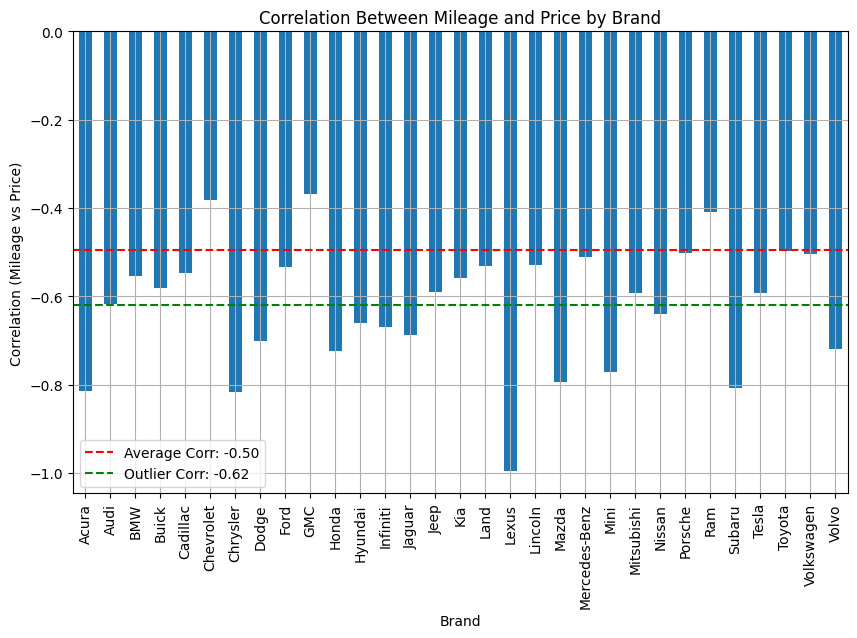

In [72]:
plt.figure(figsize=(10, 6))
brand_corr.plot(kind='bar')
plt.title('Correlation Between Mileage and Price by Brand')
plt.xlabel('Brand')
plt.ylabel('Correlation (Mileage vs Price)')

plt.axhline(general_corr, color='red', linestyle='--', label=f'Average Corr: {general_corr:.2f}')
plt.axhline(outlier_corr, color='green', linestyle='--', label=f'Outlier Corr: {outlier_corr:.2f}')

plt.legend()
plt.grid(True)
plt.show()

**Also price drop/mile for each brand is calculated**

In [73]:
def brand_slope(brand_data):
    X = brand_data[['mileage']]
    y = brand_data['price']
    model = LinearRegression()
    model.fit(X, y)
    return model.coef_[0]
brand_slopes = df.groupby('make').apply(brand_slope)
print(brand_slopes)

make
Acura           -0.240242
Audi            -0.275358
BMW             -0.363178
Buick           -0.107994
Cadillac        -0.282131
Chevrolet       -0.183163
Chrysler        -0.252484
Dodge           -0.233780
Ford            -0.175998
GMC             -0.160378
Honda           -0.140509
Hyundai         -0.123242
Infiniti        -0.241091
Jaguar          -0.381697
Jeep            -0.185726
Kia             -0.147635
Land            -0.589992
Lexus           -0.246666
Lincoln         -0.238547
Mazda           -0.126222
Mercedes-Benz   -0.316704
Mini            -0.166843
Mitsubishi      -0.130906
Nissan          -0.132161
Porsche         -0.380004
Ram             -0.143614
Subaru          -0.157174
Tesla           -0.223972
Toyota          -0.151277
Volkswagen      -0.109973
Volvo           -0.236181
dtype: float64


C:\Users\19692\AppData\Local\Temp\ipykernel_15056\829164369.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  brand_slopes = df.groupby('make').apply(brand_slope)


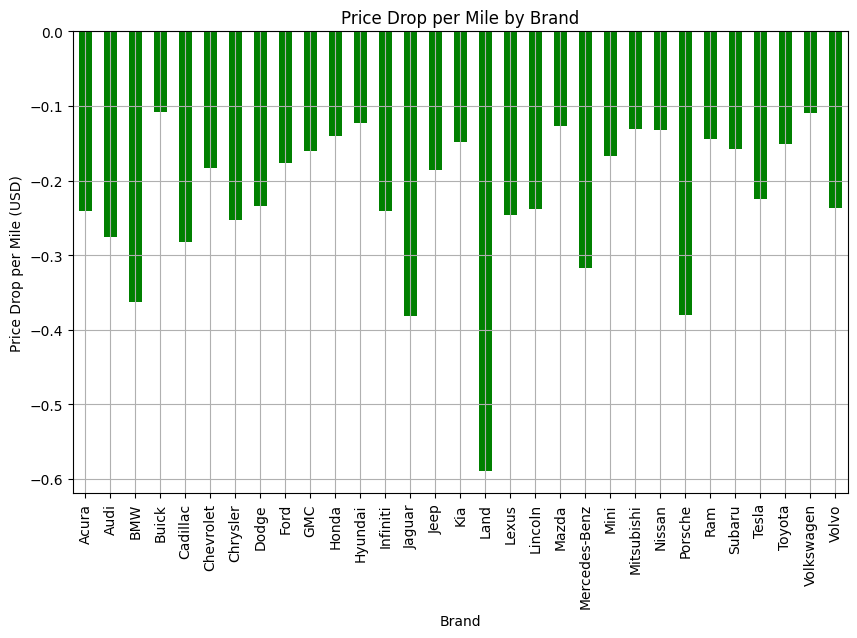

In [74]:
plt.figure(figsize=(10, 6))
brand_slopes.plot(kind='bar', color='green')
plt.title('Price Drop per Mile by Brand')
plt.xlabel('Brand')
plt.ylabel('Price Drop per Mile (USD)')
plt.grid(True)
plt.show()